In [16]:
import warnings
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split, TimeSeriesSplit

warnings.filterwarnings("ignore")

## Read data

In [3]:
df = sm.datasets.co2.load_pandas().data

In [4]:
df

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4
...,...
2001-12-01,370.3
2001-12-08,370.8
2001-12-15,371.2
2001-12-22,371.3


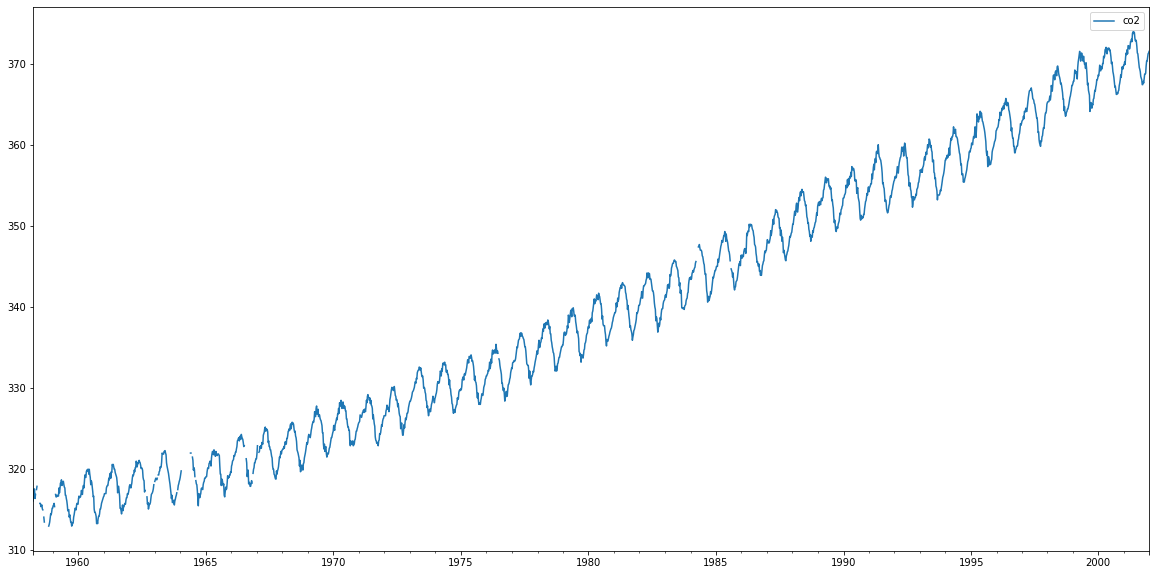

In [5]:
df.plot(figsize = (20,10))
plt.show()

# Stationary

In [6]:
adfuller_result = adfuller(df.dropna())
pvalue = adfuller_result[1]
print(adfuller_result)
if pvalue < 0.05:
    print("stationary")
else:
    print("non-stationary")

(0.043964668206227006, 0.9620203942307846, 27, 2197, {'1%': -3.433329953061165, '5%': -2.8628564476416725, '10%': -2.5674708095410446}, 2650.0984061758404)
non-stationary


In [7]:
adfuller_result = adfuller(df.dropna().diff().dropna())
pvalue = adfuller_result[1]
print(adfuller_result)
if pvalue < 0.05:
    print("stationary")
else:
    print("non-stationary")

(-15.71721575894025, 1.3373177198381386e-28, 27, 2196, {'1%': -3.4333313116437227, '5%': -2.8628570475199884, '10%': -2.567471128936201}, 2624.6205097217658)
stationary


# ACF/PACF

## lags = 40

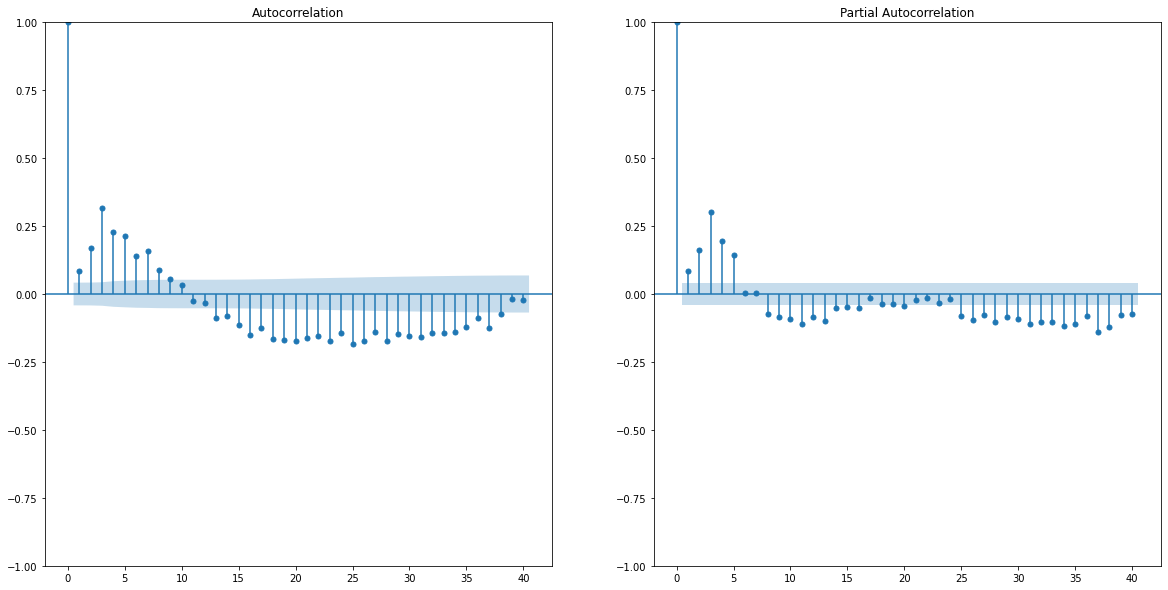

In [8]:
fig, (ax1,ax2) = plt.subplots(figsize = (20,10), ncols = 2)
plot_acf(df.diff().dropna(), ax = ax1, lags = 40)
plot_pacf(df.diff().dropna(), ax = ax2, lags = 40)
plt.show()

## lags = 600

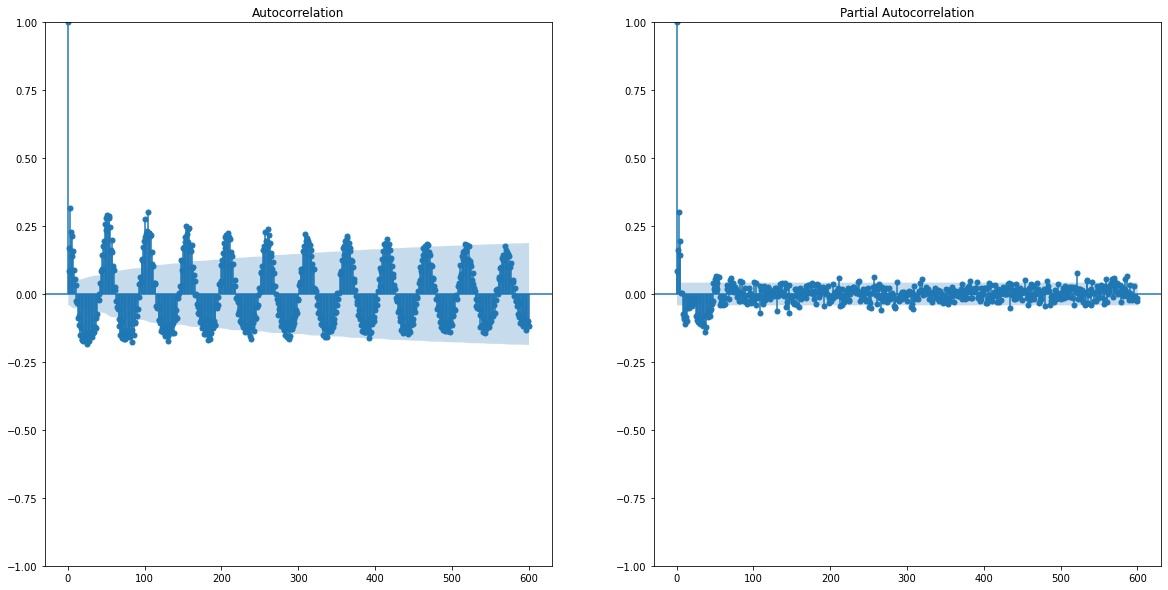

In [9]:
fig, (ax1,ax2) = plt.subplots(figsize = (20,10), ncols = 2)
plot_acf(df.diff().dropna(), ax = ax1, lags = 600)
plot_pacf(df.diff().dropna(), ax = ax2, lags = 600)
plt.show()

# Decompose

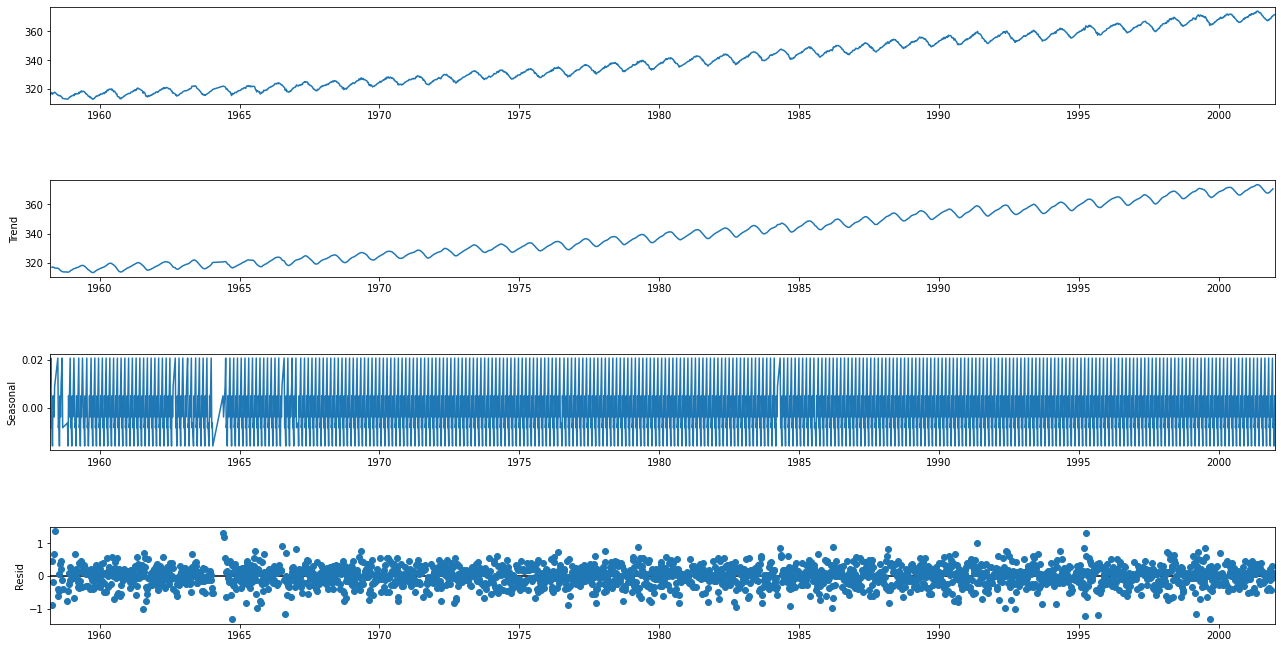

In [10]:
decompose = seasonal_decompose(df.dropna(), period = 7).plot()
decompose.set_size_inches((20,10))
plt.show()

# ARIMA

In [17]:
train, test = train_test_split(df, test_size = 0.2, shuffle = False)
p, d, q = 1,1,1
fcst = []
for step in range(test.shape[0]):
    try:
        arima = ARIMA(train, order = (p,d,q))
        arima_final = arima.fit()
        prediction = arima_final.forecast(steps = 1)
        fcst.append(prediction[0])
        train = train.append(pd.Series(test.iloc[step]))
    except:
        error = -99999
        print("error")
        fcst.append(error)
        tmp = test.iloc[step]
        tmp[0] = error
        train = train.append(pd.Series(tmp))

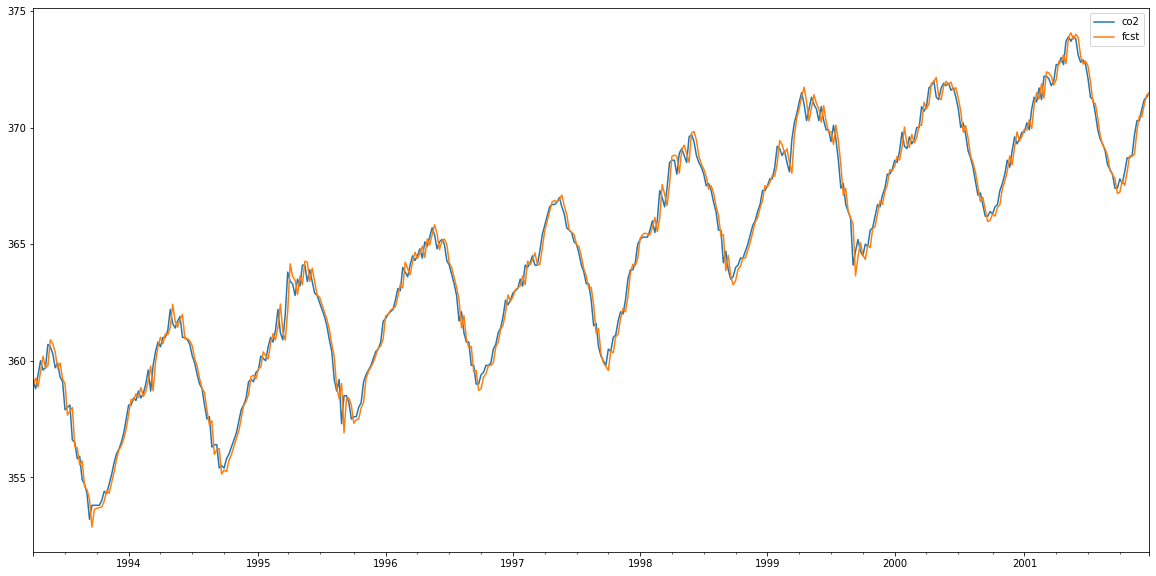

In [18]:
test["fcst"] = fcst
test.plot(figsize = (20,10))
plt.show()

In [19]:
r2_score(test.co2, test.fcst)

0.9900677585610768

In [14]:
# Author: amyrmahdy
# Date: 24 Jan 2023